In [8]:
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
model.load_weights("model.h5")

In [9]:
import pandas as p
import numpy as np
from keras.utils import np_utils

In [34]:
df=pd.read_csv('fer2013.csv')
x_train,y_train,x_test,y_test=[],[],[],[]

for index, row in df.iterrows():
    val=row['pixels'].split(' ')
    if 'Training' in row['Usage']:
        x_train.append(np.array(val,'float32'))
        y_train.append(row['emotion'])
    elif 'PublicTest' in row['Usage']:
        x_test.append(np.array(val,'float32'))
        y_test.append(row['emotion'])


Y_test=y_test
x_train=np.array(x_train,'float32')
y_train=np.array(y_train,'float32')
x_test=np.array(x_test,'float32')
y_test=np.array(y_test,'float32')


y_train=np_utils.to_categorical(y_train, num_classes=7)
y_test=np_utils.to_categorical(y_test, num_classes=7)

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

In [35]:
x_train-=np.mean(x_train,axis=0)
x_train/=np.std(x_train,axis=0)

x_test-=np.mean(x_test,axis=0)
x_test/=np.std(x_test,axis=0)



x_train=x_train.reshape(x_train.shape[0],48,48,1)
x_test=x_test.reshape(x_test.shape[0],48,48,1)


In [27]:
x_train

array([[[[-0.6098866 ],
         [-0.4592209 ],
         [-0.40325198],
         ...,
         [-0.7694696 ],
         [-0.90518403],
         [-0.95160526]],

        [[-0.66049284],
         [-0.68162924],
         [-0.694159  ],
         ...,
         [-0.7112763 ],
         [-0.7862608 ],
         [-0.90819967]],

        [[-0.83170736],
         [-0.8952668 ],
         [-0.73603356],
         ...,
         [-0.7924775 ],
         [-0.7261497 ],
         [-0.8613453 ]],

        ...,

        [[-0.33269772],
         [-0.6514918 ],
         [-0.93670547],
         ...,
         [-0.5265123 ],
         [-0.7377333 ],
         [-0.9078971 ]],

        [[-0.5099617 ],
         [-0.43692893],
         [-0.46537215],
         ...,
         [-0.10019822],
         [-0.5580577 ],
         [-0.86989194]],

        [[-0.5095401 ],
         [-0.56317693],
         [-0.3986179 ],
         ...,
         [-0.08629682],
         [-0.0573744 ],
         [-0.41127437]]],


       [[[ 0.37236458],


In [36]:
prediction=model.predict_classes(x_test)

C:\Users\D YASHOVARDHAN REDDY\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [37]:
prediction

array([4, 1, 0, ..., 4, 0, 6], dtype=int64)

In [38]:
Y_test

[0,
 1,
 4,
 6,
 3,
 3,
 2,
 0,
 2,
 0,
 3,
 0,
 4,
 2,
 6,
 2,
 5,
 0,
 5,
 3,
 2,
 5,
 0,
 4,
 0,
 2,
 4,
 4,
 0,
 2,
 3,
 6,
 3,
 6,
 0,
 4,
 6,
 2,
 6,
 3,
 0,
 4,
 4,
 2,
 6,
 3,
 5,
 3,
 5,
 6,
 0,
 3,
 5,
 4,
 4,
 3,
 4,
 2,
 5,
 3,
 6,
 3,
 4,
 3,
 5,
 3,
 5,
 4,
 2,
 6,
 0,
 5,
 6,
 6,
 2,
 6,
 5,
 6,
 4,
 4,
 0,
 0,
 1,
 3,
 5,
 4,
 3,
 3,
 3,
 3,
 6,
 0,
 6,
 4,
 5,
 2,
 3,
 3,
 3,
 0,
 3,
 6,
 0,
 3,
 2,
 3,
 6,
 6,
 5,
 3,
 3,
 0,
 0,
 2,
 3,
 2,
 3,
 6,
 2,
 6,
 5,
 0,
 0,
 2,
 4,
 6,
 3,
 6,
 5,
 5,
 2,
 0,
 2,
 6,
 5,
 5,
 5,
 6,
 2,
 6,
 6,
 3,
 1,
 4,
 4,
 6,
 3,
 3,
 3,
 2,
 2,
 0,
 5,
 3,
 5,
 5,
 4,
 5,
 0,
 3,
 0,
 3,
 3,
 0,
 6,
 6,
 3,
 4,
 5,
 3,
 6,
 4,
 5,
 6,
 0,
 0,
 0,
 4,
 4,
 5,
 4,
 3,
 5,
 3,
 3,
 0,
 4,
 3,
 3,
 3,
 4,
 6,
 5,
 5,
 3,
 6,
 5,
 6,
 0,
 1,
 3,
 6,
 2,
 3,
 6,
 2,
 0,
 4,
 2,
 2,
 6,
 0,
 4,
 4,
 4,
 2,
 5,
 4,
 0,
 3,
 3,
 4,
 5,
 0,
 0,
 3,
 5,
 6,
 4,
 3,
 1,
 6,
 5,
 2,
 3,
 4,
 3,
 0,
 0,
 6,
 3,
 6,
 6,
 0,
 1,
 3,
 3,
 3,
 0,
 6,


In [39]:
cm=confusion_matrix(Y_test,prediction)

In [44]:
cm

array([[232,   5,  57,  46,  74,   9,  44],
       [ 16,  27,   4,   3,   4,   1,   1],
       [ 45,   1, 215,  20, 114,  40,  61],
       [ 27,   1,  21, 730,  38,  16,  62],
       [ 77,   4,  69,  48, 348,  11,  96],
       [ 11,   0,  47,  19,  15, 312,  11],
       [ 45,   2,  51,  58, 134,  13, 304]], dtype=int64)

Text(60.0, 0.5, 'predicted')

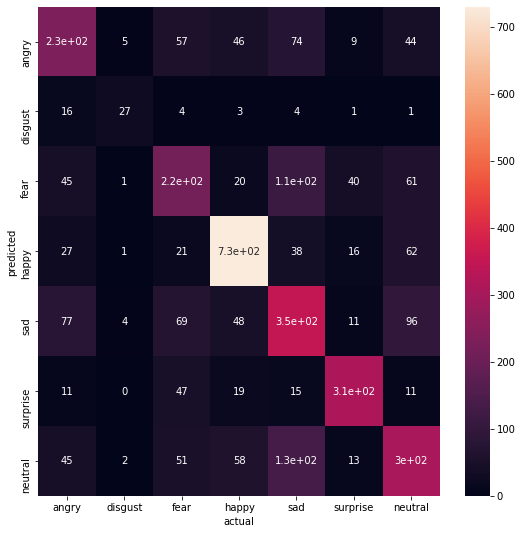

In [54]:
import seaborn as sns
plt.subplots(figsize=(9, 9))
x_axis_labels = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral'] # labels for x-axis
y_axis_labels = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
sns.heatmap(cm,annot=True,xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel('actual')
plt.ylabel('predicted')

In [47]:
len(Y_test)+len(y_train)

32298